# 계층적 군집 (2) 




## #01. 패키지 참조


In [10]:

import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram,linkage

# linkage는 계층적 군집분석의 알고리즘 모듈
## linked = linkage(x,'single')을 통해 최소거리 측정법으로 유사도를 측정
## dendropgram(linked,orientation = 'top',labels=labelList,distance_sort='descending',show_leaf_count = True)



## #02. 데이터 가져오기

In [11]:
origin  = pd.read_excel('https://data.hossam.kr/G02/customer.xlsx')
origin.head()

,고객ID,성별,나이,연수입,지출점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## #03.데이터 전처리

In [12]:
x = origin.iloc[:,3:5]

x

,연수입,지출점수
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_data = scaler.fit_transform(x)
n_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### 3. 데이터 분포 확인

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

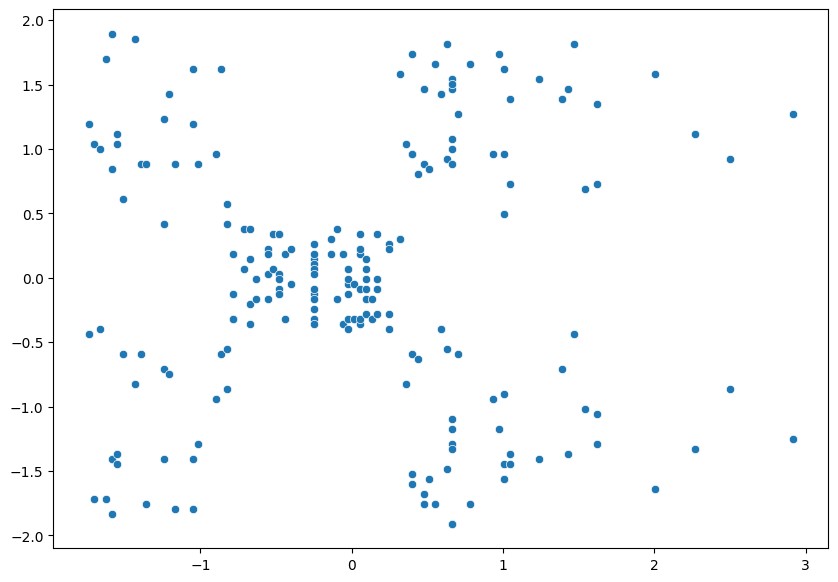

In [17]:
plt.figure(figsize=(10,7))

sb.scatterplot(x=n_data[:,0],y=n_data[:,1])

## #04. 계층 군집 수행

### 1. scipy 패키지


In [21]:
import scipy.cluster.hierarchy as shc


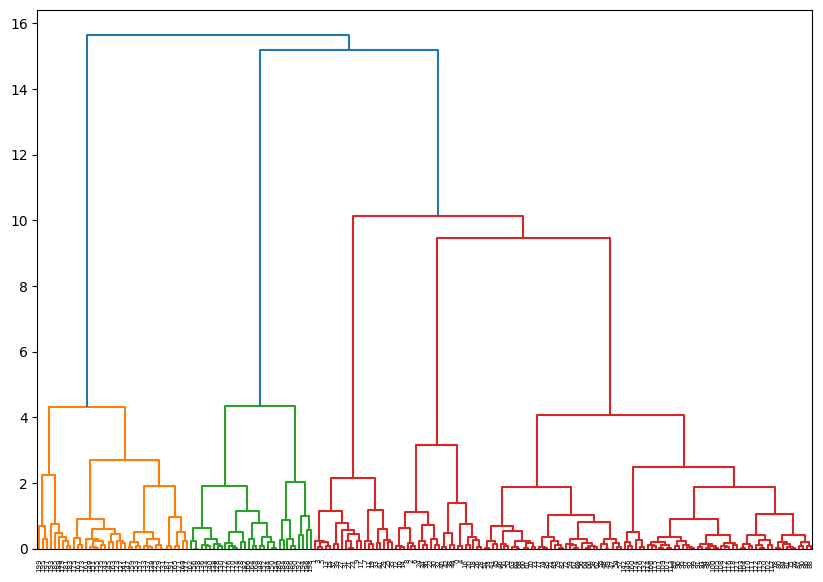

In [23]:
linked = linkage(n_data,method='ward')
labelList = range(1,11)
plt.figure(figsize=(10,7))
shc.dendrogram(shc.linkage(n_data,method='ward'),)
plt.show()

### 2. sklearn 사용

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
n_samples

200

In [30]:
ac = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage = 'ward',compute_distances=True)
clustering = ac.fit(x)
clustering

counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)





In [33]:
clustering.children_

array([[ 65,  68],
       [ 48,  49],
       [156, 158],
       [129, 131],
       [ 21,  23],
       [ 51,  53],
       [ 60,  61],
       [ 67,  69],
       [ 64,  66],
       [ 79,  82],
       [ 74,  85],
       [ 78,  80],
       [ 75,  81],
       [ 92,  97],
       [101, 109],
       [107, 113],
       [ 94,  98],
       [103, 104],
       [100, 105],
       [150, 154],
       [119, 120],
       [170, 174],
       [151, 155],
       [ 63, 200],
       [ 99, 213],
       [  3,   5],
       [ 26,  28],
       [ 40,  42],
       [ 10,  14],
       [ 54,  57],
       [ 58,  62],
       [ 70,  73],
       [ 91,  93],
       [108, 112],
       [126, 132],
       [137, 139],
       [147, 159],
       [ 77, 210],
       [ 76, 212],
       [149, 222],
       [ 12, 228],
       [116, 233],
       [ 13,  15],
       [  2,   6],
       [ 87,  90],
       [106, 110],
       [114, 115],
       [128, 130],
       [134, 136],
       [148, 152],
       [153, 157],
       [165, 171],
       [111,

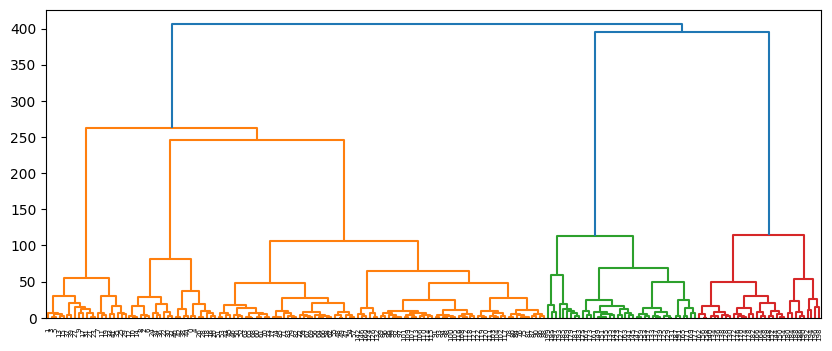

In [44]:
for i,merge in enumerate(clustering.children_):
    current_count = 0 
    
    for child_idx in merge :
        if child_idx < n_samples :
            current_count =+ 1 # leaf node
        else : 
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack([clustering.children_,clustering.distances_,counts]).astype(float)

plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix)
plt.show()
plt.close()
